In [1]:
from models import FamaFrench3Factor, FamaFrench5Factor
import pandas as pd
import getFamaFrenchFactors as gff


In [2]:
stocks_df = pd.read_csv('data/market_data/sp500/sp500_stocks.csv')
stocks_df = stocks_df.pivot(
    index='Date', columns='Symbol', values='Adj Close')

stocks_df = stocks_df.reset_index()
stocks_df['Date'] = pd.to_datetime(stocks_df['Date'])
stocks_df = stocks_df.set_index('Date')

stocks_df.head()

Symbol,A,AAL,AAPL,ABBV,ABNB,ABT,ACGL,ACN,ADBE,ADI,...,WTW,WY,WYNN,XEL,XOM,XYL,YUM,ZBH,ZBRA,ZTS
Date,,,,,,,,,,,,,,,,,,,,,
2010-01-04,20.122227,4.496877,6.470741,NaN,NaN,18.952162,7.994444,32.212460,37.090000,23.694084,...,52.883579,9.905468,41.963718,12.918809,43.185623,NaN,19.158102,52.587051,28.670000,NaN
2010-01-05,19.903643,5.005957,6.481929,NaN,NaN,18.799042,7.967778,32.411549,37.700001,23.656675,...,52.765053,10.115747,44.515926,12.765595,43.354244,NaN,19.092571,54.251759,28.620001,NaN
2010-01-06,19.832930,4.798554,6.378825,NaN,NaN,18.903446,7.933333,32.756096,37.619999,23.611784,...,53.614498,10.003899,43.932011,12.790110,43.728970,NaN,18.956089,54.234219,28.400000,NaN
2010-01-07,19.807215,4.939964,6.367033,NaN,NaN,19.060045,7.886667,32.725471,36.889999,23.424749,...,53.456463,9.959157,44.870213,12.734954,43.591564,NaN,18.950626,55.478374,27.690001,NaN
2010-01-08,19.800785,4.845691,6.409364,NaN,NaN,19.157482,7.871111,32.595306,36.689999,23.559416,...,53.397202,9.867439,44.548744,12.741086,43.416687,NaN,18.956089,54.313072,27.600000,NaN


In [24]:
ff5 = gff.famaFrench5Factor()
carhart = gff.carhart4Factor()

In [6]:
ff5.head()

,date_ff_factors,Mkt-RF,SMB,HML,RMW,CMA,RF
0,1963-07-31,-0.0039,-0.0041,-0.0097,0.0068,-0.0118,0.0027
1,1963-08-31,0.0507,-0.0080,0.0180,0.0036,-0.0035,0.0025
2,1963-09-30,-0.0157,-0.0052,0.0013,-0.0071,0.0029,0.0027
3,1963-10-31,0.0253,-0.0139,-0.0010,0.0280,-0.0201,0.0029
4,1963-11-30,-0.0085,-0.0088,0.0175,-0.0051,0.0224,0.0027


AAPL correlation with market index: 0.6105118246647935
AAPL correlation with small-company portfolio index: 0.06797184399335747
AAPL correlation with value stocks index: -0.1897047110321644
AAPL correlation with return on equity index: 0.11173870860705275
AAPL correlation with investments: -0.1897047110321644


<Figure size 2000x1000 with 0 Axes>

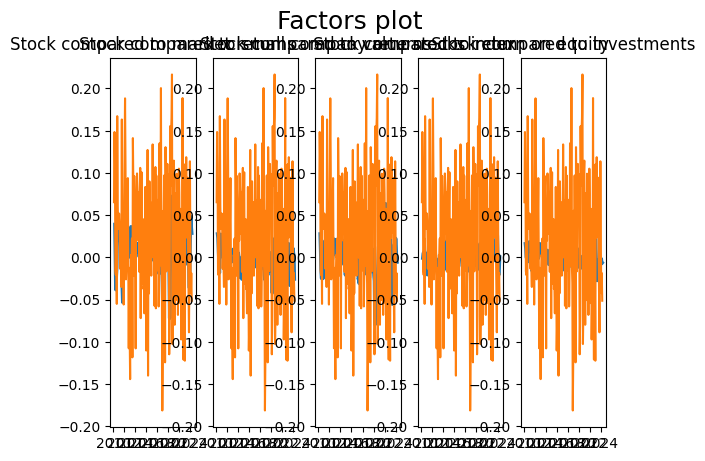

In [4]:

ff5_model = FamaFrench5Factor(stocks_df)
# ff5_model.fit('AAPL')
ff5_model.factors_plot('AAPL')

0
1
2
3
4
5


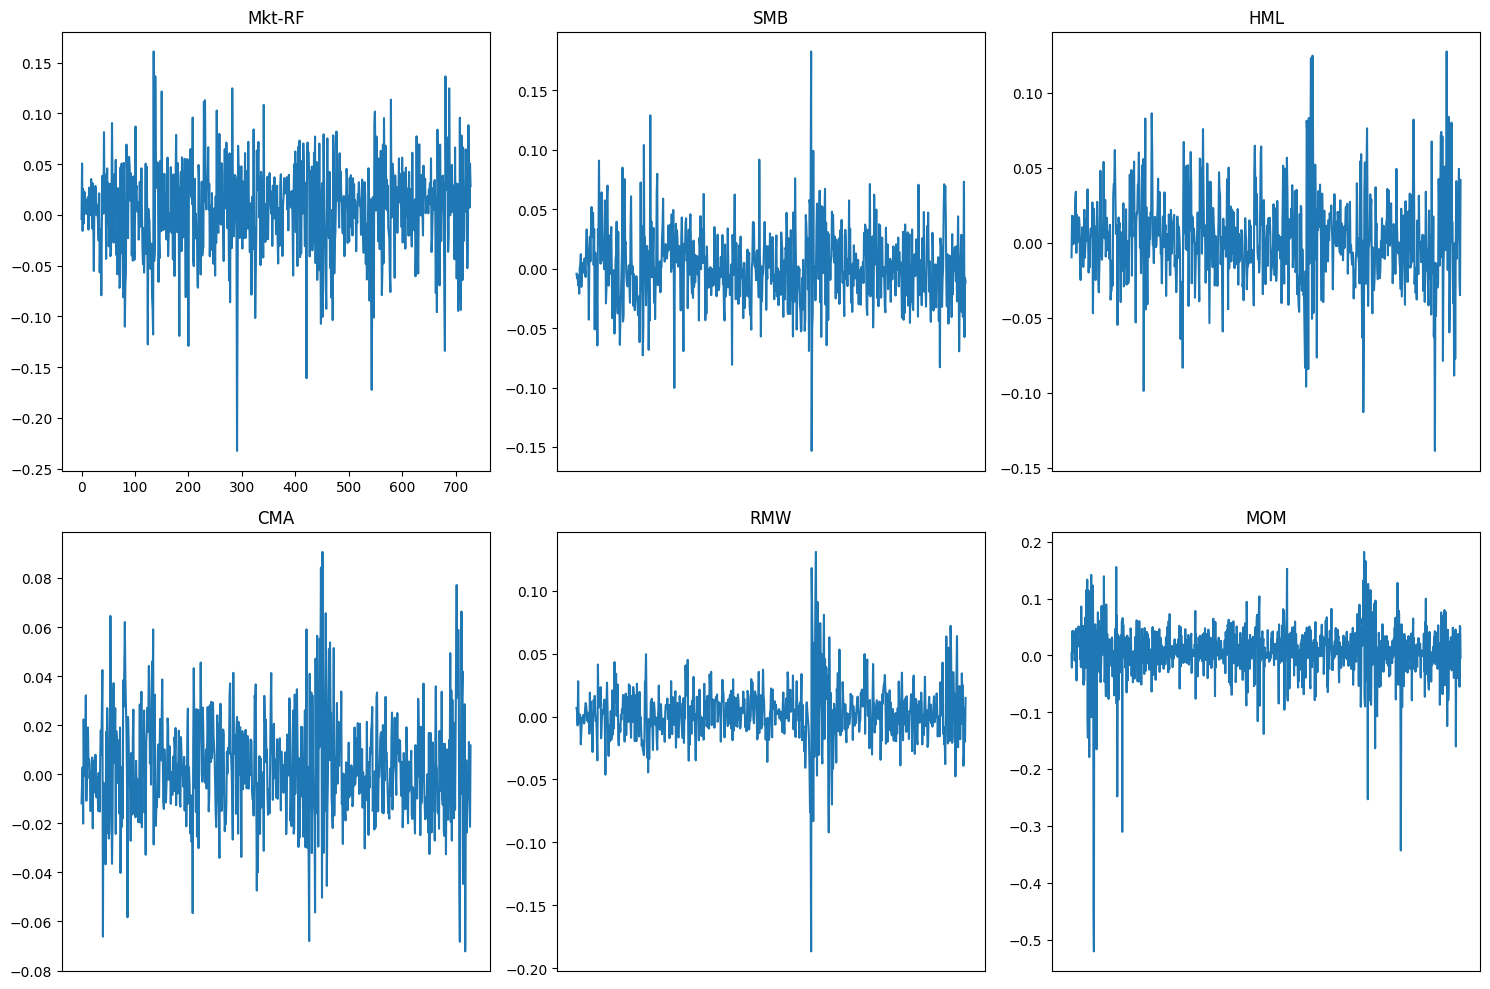

In [28]:
import matplotlib.pyplot as plt

arr = ['Mkt-RF', 'SMB', 'HML', 'CMA', 'RMW', 'MOM']

# Создаем фигуру с 3 столбцами (для первой строки) и 2 столбцами (для второй строки)
fig, axs = plt.subplots(2, 3, figsize=(15, 10))

axs[0, 0].plot(ff5['Mkt-RF'])
axs[0, 1].plot(ff5['SMB'])
axs[0, 2].plot(ff5['HML'])
axs[1, 0].plot(ff5['CMA'])
axs[1, 1].plot(ff5['RMW'])
axs[1, 2].plot(carhart['MOM'])

# Убираем оси x из всех подграфиков, кроме первого
for i, ax in enumerate(axs.flat):
    print(i)
    ax.set_title(arr[i])
        
    if ax != axs[0, 0]:
        ax.set(xticks=[], xticklabels=[])

plt.tight_layout()  # Автоматически корректирует положение подграфиков
plt.show()

In [15]:
import pandas as pd
from statsmodels.tsa.stattools import adfuller

# Предполагается, что ff5 уже загружен и содержит ваши данные
# Примерный формат ff5 может выглядеть так:
# ff5 = pd.DataFrame({
#     'CMA': [...],
#     'Mkt-RF': [...],
#     'SMB': [...],
#     'HML': [...],
#     'RMW': [...]
# })


def adf_test(series):
    result = adfuller(series)
    print(f"ADF Statistic: {result[0]}")
    print(f"p-value: {result[1]}")
    
    if result[1] < 0.05:
        print(f"{series.name} is likely non-stationary.")
    else:
        print(f"{series.name} is likely stationary.")
      
    # for key, value in result[4].items():
    #     print(f"\t{key}: {value}")


# Проведение теста Дики-Фуллера для каждой переменной
for column in ['Mkt-RF', 'SMB', 'HML', 'RMW', 'CMA']:
    print(f"Testing for stationarity in {column}...")
    adf_test(ff5[column])
    print("\n")

Testing for stationarity in Mkt-RF...


LinAlgError: SVD did not converge

## Корреляция сектора Technologies с факторами
